In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from pyfolio.timeseries import perf_stats
import sys
sys.path.append('/home/tomek/ib_tools')
from blotter import MongoBlotter
%matplotlib inline

In [26]:
cash = 109394
df = MongoBlotter().read()
df.tail(20)

,_id,sys_time,time,contract,action,amount,price,exec_ids,order_id,perm_id,reason,commission,realizedPNL
354,5f3fbd35ab7edc8f0e31505b,2020-08-21 14:25:25.972,2020-08-21 12:25:25.971,GCZ0,BUY,1.0,1929.600000,[0000e1a7.5f3f3899.01.01],55,1051676602,STOP-LOSS,2.42,2065.16
355,5f3fc7beab7edc8f0e315084,2020-08-21 15:10:22.003,2020-08-21 13:10:22.003,YM SEP 20,BUY,3.0,27626.000000,[0000e1a7.5f3f40ee.01.01],58,1051676607,STOP-LOSS,6.30,17.40
356,5f3fd1a4ab7edc8f0e3150a5,2020-08-21 15:52:36.257,2020-08-21 13:52:36.155,GCZ0,SELL,1.0,1932.800000,[0000e1a7.5f3f5557.01.01],59,1051676610,ENTRY,2.42,0.00
357,5f3fd1acab7edc8f0e3150a6,2020-08-21 15:52:44.123,2020-08-21 13:52:43.985,MGCZ0,SELL,3.0,1932.700000,"[0000e1a7.5f3f5558.01.01, 0000e1a7.5f3f5562.01...",60,1051676613,ENTRY,1.41,0.00
358,5f3fd831ab7edc8f0e3150bf,2020-08-21 16:20:33.183,2020-08-21 14:20:33.182,GCZ0,BUY,1.0,1939.700000,[0000e1a7.5f3f615c.01.01],61,1051676614,STOP-LOSS,2.42,-694.84
359,5f3fd831ab7edc8f0e3150c0,2020-08-21 16:20:33.426,2020-08-21 14:20:33.383,MGCZ0,BUY,3.0,1939.900000,"[0000e1a7.5f3f615d.01.01, 0000e1a7.5f3f615e.01...",62,1051676615,STOP-LOSS,1.41,-218.82
360,5f3fd9d3ab7edc8f0e3150c1,2020-08-21 16:27:31.690,2020-08-21 14:27:31.684,MNQU0,BUY,2.0,11522.750000,[0000e1a7.5f3f6460.01.01],64,1051676621,ENTRY,0.94,0.00
361,5f3fd9d9ab7edc8f0e3150c2,2020-08-21 16:27:37.254,2020-08-21 14:27:37.159,NQU0,BUY,3.0,11523.000000,"[0000e1a7.5f3f645f.01.01, 0000e1a7.5f3f6469.01...",63,1051676618,ENTRY,6.30,0.00
362,5f3fdfefab7edc8f0e3150db,2020-08-21 16:53:35.816,2020-08-21 14:53:35.810,MESU0,BUY,1.0,3386.500000,[0000e1a7.5f3f6d94.01.01],68,1051676629,ENTRY,0.47,0.00
363,5f3fdff1ab7edc8f0e3150dc,2020-08-21 16:53:37.504,2020-08-21 14:53:37.407,ESU0,BUY,1.0,3386.500000,[0000e1a7.5f3f6d96.01.01],67,1051676626,ENTRY,2.10,0.00


In [3]:
#del df['sys_time']
del df['exec_ids']
del df['perm_id']
del df['_id']
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)
df['cash'] = df.realizedPNL.cumsum() + cash
df['contract'] = df['contract'].apply(lambda x: x[:-2])
micro_contracts = df[df.contract.str.startswith('M')]
macro_contracts = df[~df.contract.str.startswith('M')]
micro_contracts['amount'] /= 10
df = pd.concat([macro_contracts, micro_contracts]).sort_index()
df.contract = df.contract.str.strip('M')
df['contract'] = df['contract'].apply(lambda x: x[:2])
df.contract = df.contract.str.strip()

In [4]:
df.tail()

,sys_time,contract,action,amount,price,order_id,reason,commission,realizedPNL,cash
time,,,,,,,,,,
2020-08-21 16:40:51.205,2020-08-21 18:40:51.302,GC,SELL,0.5,1940.840000,72,ENTRY,2.35,0.00,129906.540001
2020-08-21 18:50:01.701,2020-08-21 20:50:01.704,NQ,BUY,0.3,11547.500000,76,ENTRY,1.41,0.00,129906.540001
2020-08-21 18:50:07.114,2020-08-21 20:50:07.213,NQ,BUY,3.0,11548.666667,75,ENTRY,6.30,0.00,129906.540001
2020-08-21 19:41:01.911,2020-08-21 21:41:01.914,NQ,SELL,3.0,11542.833333,78,STOP-LOSS,6.30,-362.60,129543.940001
2020-08-21 19:41:16.858,2020-08-21 21:41:16.860,NQ,SELL,0.3,11542.500000,77,STOP-LOSS,1.41,-32.82,129511.120001


In [5]:
c = set(df['contract'])
allocs = pd.Series([1/len(c)]*len(c) +[1], index=list(c) + ['total'])
#allocs = pd.Series([1/3, 2/3, 1], index=['ES','NQ', 'total'])

In [6]:
allocs

GC       0.25
ES       0.25
NQ       0.25
YM       0.25
total    1.00
dtype: float64

In [7]:
df.groupby('contract').realizedPNL.sum()

contract
ES    -4680.800000
GC    10489.300001
NQ     9672.220000
YM     4636.400000
Name: realizedPNL, dtype: float64

In [8]:
df.realizedPNL.sum()

20117.120000999996

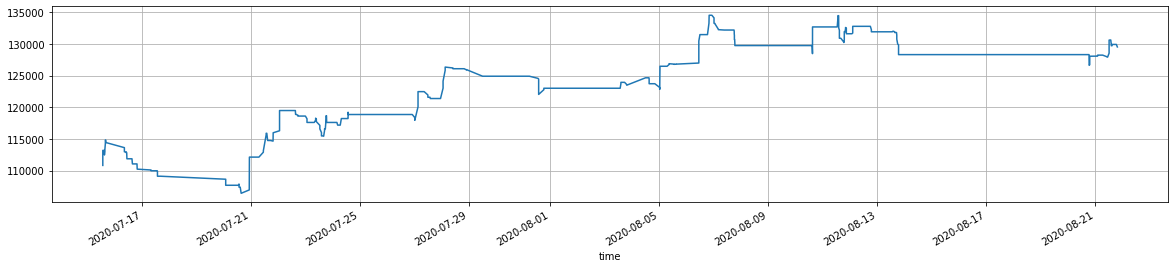

In [9]:
df.cash.plot(figsize=(20,4), grid=True);

In [10]:
by_contract = pd.pivot_table(df, values='realizedPNL', index=df.index, columns=['contract'])
by_contract['total'] = by_contract.sum(axis=1)

In [11]:
# number of trades
trades = df.groupby('contract').action.count()
trades, trades.sum()

(contract
 ES     50
 GC    118
 NQ    172
 YM     32
 Name: action, dtype: int64,
 372)

In [12]:
# trades per day
days = len(by_contract.resample('B').count().index)
trades/days, trades.sum()/days

(contract
 ES    1.785714
 GC    4.214286
 NQ    6.142857
 YM    1.142857
 Name: action, dtype: float64,
 13.285714285714286)

In [13]:
# commission paid
df.groupby('contract').commission.sum()

contract
ES    130.47
GC    293.95
NQ    350.72
YM     95.18
Name: commission, dtype: float64

In [14]:
df.commission.sum()

870.32

In [15]:
# per trade stats (pro rated per macro contract)
exits = df[df.realizedPNL!=0]
dfs = {}
for contract in exits.contract.unique():
    dfs[contract] = exits[exits.contract == contract]
dfs['total'] = exits
results = pd.DataFrame(columns=['success_rate', 'average_PNL', 'average_gain', 'average_loss', 
                                'win_ratio', 'EV/contract', 'number_of_contracts'])
for c, d in dfs.items():
    row = pd.Series()
    row['success_rate'] = round((d[d.realizedPNL > 0]).realizedPNL.count() / d.realizedPNL.count(), 2)
    d['pnl_per_contract'] = d.realizedPNL / d.amount
    row['average_PNL'] = round(d['pnl_per_contract'].mean(), 2)
    row['average_gain'] = round((d[d.realizedPNL > 0])['pnl_per_contract'].mean(), 2)
    row['average_loss'] = round((d[d.realizedPNL < 0])['pnl_per_contract'].mean(), 2)
    row['win_ratio'] = round(abs(row['average_gain'] / row['average_loss']), 2)
    row['EV/contract'] = round((row['average_gain'] * row['success_rate']) + (
        row['average_loss'] * (1 - row['success_rate'])), 2)
    row['number_of_contracts'] = d.amount.sum()
    results.loc[c] = row
results

,success_rate,average_PNL,average_gain,average_loss,win_ratio,EV/contract,number_of_contracts
YM,0.41,327.94,1429.29,-442.99,3.23,324.64,19.5
NQ,0.42,158.54,1026.82,-461.66,2.22,163.50,63.7
ES,0.25,-161.79,1081.57,-576.24,1.88,-161.79,25.0
GC,0.39,213.34,1446.68,-561.91,2.57,221.44,47.1
total,0.38,149.28,1203.72,-509.73,2.36,141.38,155.3


In [16]:
daily = by_contract.resample('B').sum()
daily = daily /  (allocs * cash)
#daily[['CL', 'ES', 'GC', 'NQ']].plot(figsize=(20,8), grid=True);

In [17]:
# instrument correlations
log_returns = np.log(daily + 1)
log_returns.corr()

,ES,GC,NQ,YM,total
ES,1.000000,0.122517,-0.282514,0.418735,0.428819
GC,0.122517,1.000000,0.016343,-0.064117,0.549903
NQ,-0.282514,0.016343,1.000000,0.177316,0.546055
YM,0.418735,-0.064117,0.177316,1.000000,0.619036
total,0.428819,0.549903,0.546055,0.619036,1.000000


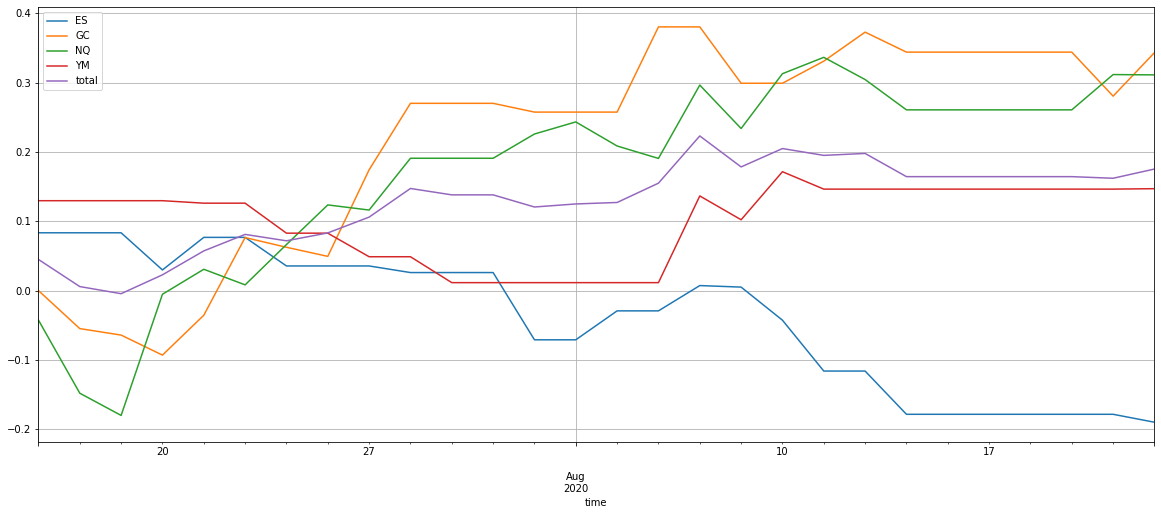

In [18]:
log_returns.cumsum().plot(figsize=(20,8), grid=True);

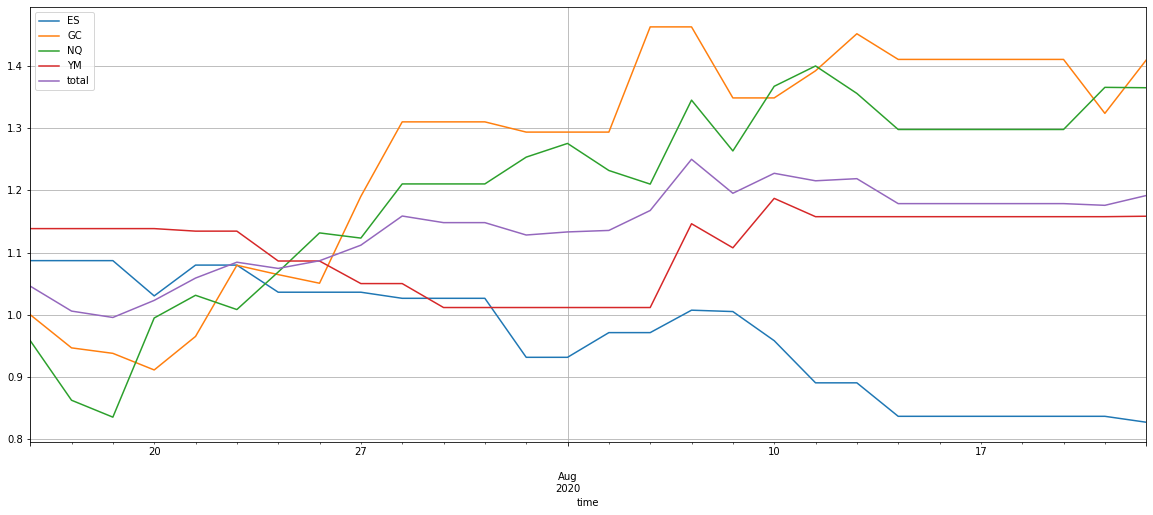

In [19]:
returns = daily.copy()
returns_index = (returns + 1).cumprod()
returns_index.plot(figsize=(20,8), grid=True);

In [20]:
stats = pd.DataFrame()
for col in daily.columns:
    stats[col] = perf_stats(daily[col])
stats

,ES,GC,NQ,YM,total
Annual return,-0.819120,20.978715,15.463824,2.755775,3.847059
Cumulative returns,-0.173034,0.409650,0.365118,0.158392,0.191693
Annual volatility,0.579729,0.860458,0.925642,0.662984,0.407143
Sharpe ratio,-2.657077,4.011676,3.470596,2.301372,4.083204
Calmar ratio,-3.424598,220.603943,93.802297,24.710029,64.945203
Stability,0.875090,0.743695,0.763927,0.093752,0.708088
Max drawdown,-0.239187,-0.095097,-0.164855,-0.111525,-0.059235
Omega ratio,0.556662,2.283607,1.914082,1.970661,2.066980
Sortino ratio,-3.315922,9.405077,7.335125,6.550380,7.725283
Skew,-0.088484,0.859751,0.950570,2.233700,0.257443


In [21]:
# monthly returns in percent
monthly_log_returns = log_returns.resample('M').sum()
monthly_returns = np.exp(monthly_log_returns)-1
round(monthly_returns, 4) * 100

,ES,GC,NQ,YM,total
time,,,,,
2020-07-31,-6.86,29.38,25.35,1.15,12.82
2020-08-31,-11.21,8.96,8.91,14.52,5.63


In [22]:
# total returns by contract in percent
round(np.exp(monthly_log_returns.sum())-1, 2)* 100

ES      -17.0
GC       41.0
NQ       37.0
YM       16.0
total    19.0
dtype: float64

In [23]:
df.sort_values('realizedPNL', ascending=False)[['contract', 'action', 'price', 'realizedPNL']]

,contract,action,price,realizedPNL
time,,,,
2020-07-20 22:44:06.883,NQ,SELL,10934.00,5180.80
2020-08-06 10:49:16.287,YM,SELL,27017.00,3471.60
2020-07-22 01:17:38.552,GC,SELL,1860.40,3190.32
2020-08-05 00:35:18.941,GC,SELL,2036.30,2815.16
2020-07-21 13:30:08.703,GC,SELL,1837.40,2510.32
...,...,...,...,...
2020-08-11 14:42:33.795,GC,BUY,1962.80,-1264.84
2020-08-20 18:49:38.284,GC,BUY,1957.20,-1284.84
2020-08-13 18:51:02.284,ES,SELL,3362.00,-1550.10


In [24]:
daily.sort_values('total', ascending=False)

,ES,GC,NQ,YM,total
time,,,,,
2020-08-06,0.037172,0.000000,0.111660,0.133267,0.070525
2020-07-15,0.086951,0.000000,-0.041694,0.138478,0.045934
2020-07-28,-0.009478,0.100648,0.077581,0.000000,0.042188
2020-07-21,0.048123,0.059194,0.036711,-0.003575,0.035113
2020-08-05,0.000000,0.130831,-0.017782,0.000000,0.028262
2020-07-20,-0.052202,-0.028497,0.191042,0.000000,0.027586
2020-08-10,-0.046631,0.000000,0.082316,0.071804,0.026872
2020-07-22,0.000000,0.118659,-0.022251,0.000000,0.024102
2020-07-27,0.000000,0.133071,-0.007373,-0.033426,0.023068
